# Tutorial
This notebook contains 5 tutorial examples to demonstrate the functioning of "Newton Solver". Please ensure that *numpy* package is installed before running the code blocks. It is recommended to go through the file README.md first before going through the tutorial.

## Directions to use
Please run code blocks one by one as they appear to ensure the proper functionality of this notebook. At the very least, please run the first code block that imports the *Newton Solver* file and other required packages before running the subsequent tutorial example code blocks.

In [1]:
'''python
This code block imports the newton solver function and the required packages which will be required 
for the functioning of tutorial examples.
'''
from Newton_Solver import Newton_Solver as ns
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

ModuleNotFoundError: No module named 'Newton_Solver'

### Calling the Newton Solver function
User can call Newton Solver function after importing the required file and packages as:\
&emsp;&emsp;&emsp;&emsp;**ns.run_newton_solver(F, J, x0, tol, max_iter)**\
It takes 5 different parameters as input. They are:\
&emsp;F: Function(s) (or expression(s)) of variable(s). User might be seeking the solution(s) to this system of expression(s).\
&emsp;J: Jacobian matrix of F.\
&emsp;x0: Initial guess(es).\
&emsp;tol: acceptable tolerance (float) for the solution (should be greater than 0).\
&emsp;max_iter: maximum number of iterations (positive integer) user wants to allow before changing the parameters for convergence.

## Example 1
### Root of $f(x) = \sin{x}$ in the interval $[\pi/2$, $3\pi/2]$
This example demonstrate the functioning of the Newton Solver function by seeking a solution of $\sin{x} = 0$. Multiple initial guesses are provided to check for multiple roots.
&emsp;Please run the following code block to verify.

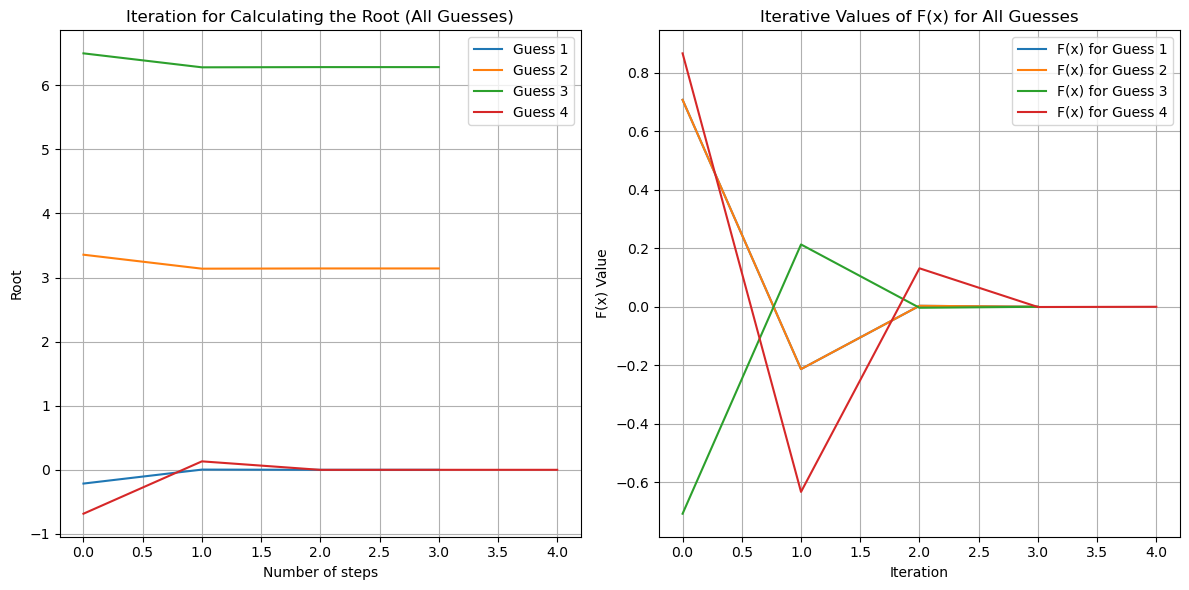

The roots are found to be:
Root 1: 0.0000
Root 2: 3.1416
Root 3: 6.2832


In [18]:
'''
This code block demonstrates the functionality of Newton Solver function by seeking solutions to F(x) = sin(x) 
for multiple initial guesses.
'''
F = lambda x: np.array([np.sin(x)])
J = lambda x: np.array([[np.cos(x)]])
x0_list = [np.pi/4, 3*np.pi/4, 7*np.pi/4, np.pi/3]
roots = ns.run_newton_solver(F, J, x0_list, tol = 1e-6, max_iter = 100)
print("The roots are found to be:")
for i, root in enumerate(roots, 1):
    print(f"Root {i}: {root.item():.4f}")

## Example 2
### Fixed point of a first order ordinary differential equation
Fixed point of a differential equation refers to a specific value of the dependent variable where derivative is zero. For example, the fixed point of $\frac{\mathrm{d}x}{\mathrm{d}t} = \sin{x(t)}$ for $x \in [\pi/2, 3\pi/2]$ will be at $x = \pi$ as $\sin{x} = 0$ at $x = \pi$ in the given interval. The importance and properties of fixed points will be explained in a subsequent example if needed.\
Let's try to find the fixed points of:
$$\frac{\mathrm{d}x}{\mathrm{d}t} - x^2 + 25x = 100$$
with the initial guesses 0, 10, 100 and 1000. This can be achieved by rearranging the expression as $\dot{x} = x^2 - 25x +100$, where $\dot{x} = \mathrm{d}x/\mathrm{d}t$. Now we take the R.H.S. $F(x) = x^2 - 25x + 100$ and use the Newton Solver to seek the solution(s) for $F(x) = 0$.

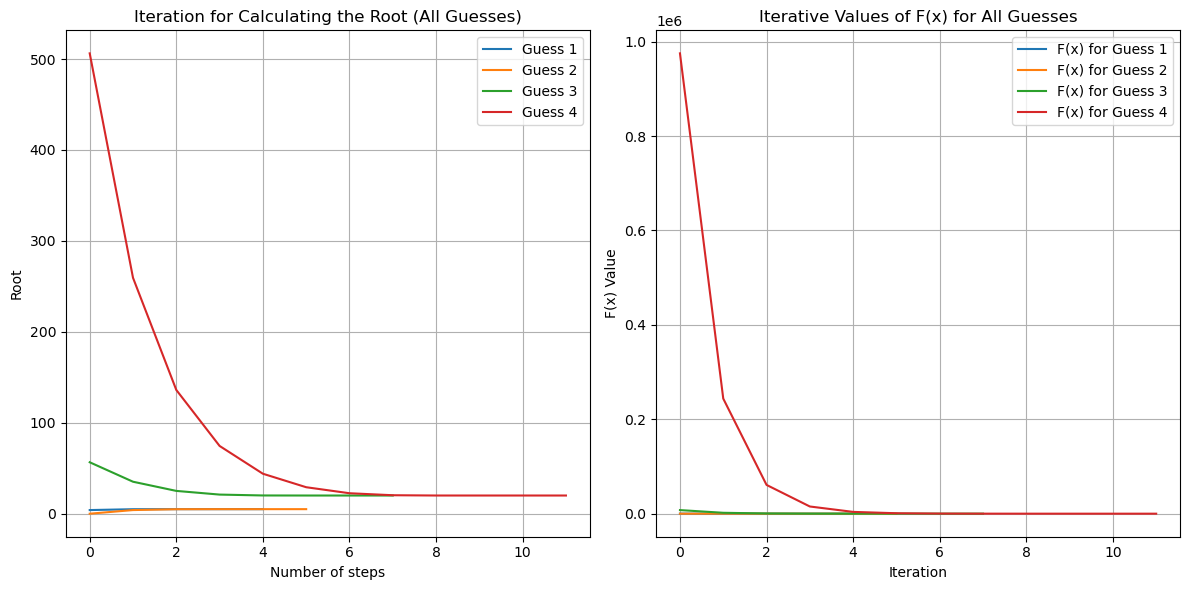

The fixed points are found to be:
Fixed point 1: 5.0000
Fixed point 2: 20.0000


In [14]:
'''
This code block seeks the solution of x**2 - 25*x + 100 = 0 using Newton Solver.
'''
F = lambda x: np.array([x**2 - 25*x + 100])
J = lambda x: np.array([[2*x - 25]])
x0_list = np.array([0 , 10, 100, 1000])
roots = ns.run_newton_solver(F, J, x0_list, tol = 1e-6, max_iter = 100)
print("The fixed points are found to be:")
for i, root in enumerate(roots, 1):
    print(f"Fixed point {i}: {root.item():.4f}")

## Example 3
### (Mechanics) Measuring fluid velocity in a pipe using a pitot tube
Pitot tube is a device used to measure the velocity of an icompressible fluid in a pipe or confined system. It uses Bernoulli's principle to calculate the velocity by equating stagnation pressure to the sum of static pressure and dynamic pressure.
$$p_t = p_s + \frac{\rho u^2}{2}$$
where, $p_t$ is the stagnation pressure, $p_s$ is the static pressure and $u$ is the velocity. Please refer to README.md for extended description.\
Let's take an hypothetical example in which water ($\rho = 1,000\ \mathrm{kg/m}^3$) and let's say $p_t = 100,000\ \mathrm{N/m}^2$ and $p_s = 50,000\ \mathrm{N/m}^2$. Let's calculate the fluid velocity using bisection method. The fluid velocity cannot be negative so let's start with a sufficiently large guess (let's say $100\ \mathrm{m/s}$).

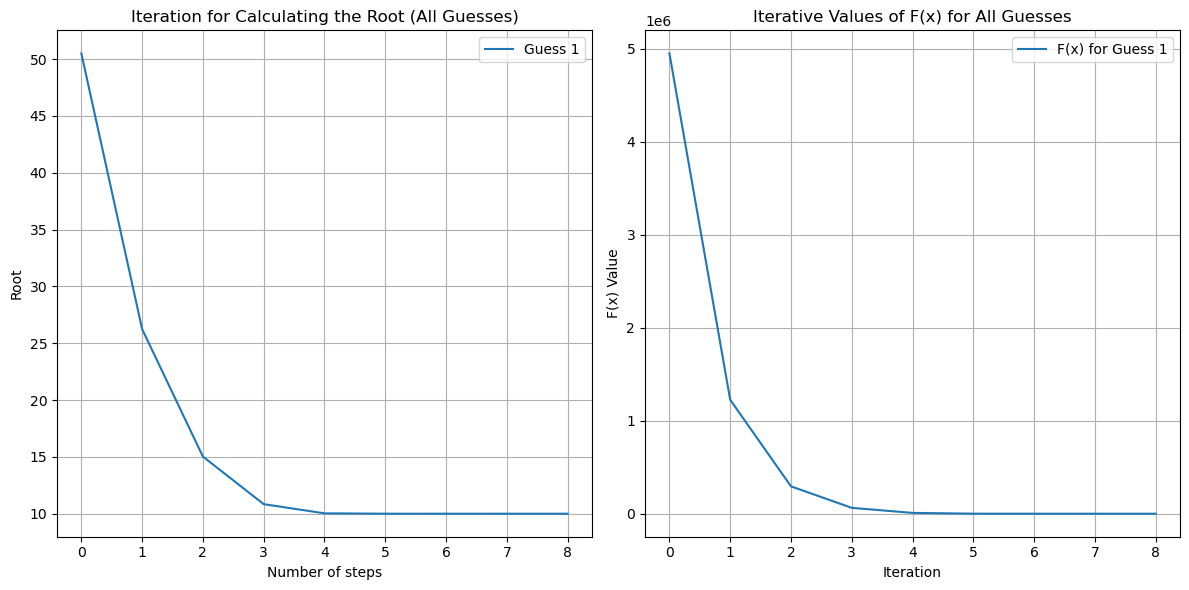

The velocity is found to be: 10.0 m/s.


In [19]:
'''
This code block calculates the velocity of water in a pipe using the principle of pitot tube with the help of Newton Solver.
'''
p_t = 100000            # stagnation pressure
p_s = 50000             # static pressure
rho = 1000              # density of water
x0_list = [100]         # initial guess for velocity
# let x be the unknown velocity
F = lambda x: np.array([p_s - p_t + (rho*(x**2))/2])
J = lambda x: np.array([[rho*x]])
root = ns.run_newton_solver(F, J, x0_list, tol = 1e-6, max_iter = 100)
print("The velocity is found to be:",root[0].item(),"m/s.")

## Example 4
### (Mechanics) Deflection of a rectangular cantilever beam due to concentrated load.
Let's take a cantilever beam of length $L$, and let's say that a load $P$ is acting vertically (through neutral axis) at a distance $A$ from the fixed end. Then the deflection at that point can be calculated as:
$$\delta_{A} = \frac{PA^2(3L - A)}{6EI}$$
where, $E$ is the Young's modulus of the beam and $I$ is the second moment of area along the axis that is perpendicular to the direction in which load is applied. For a rectangular beam with width $w$ and height $h$, $I$ can be calculated as:
$$I = \frac{wh^3}{12}$$
Let's take an example in which a load $P = 3000000\ \mathrm{N}$ is acting on a beam of length $L = 1\ \mathrm{m}$ made of steel ($E = 200,000,000,000\ \mathrm{N/m^2}$). The dimensions are given as $w = 0.1\ \mathrm{m}$ and $h = 0.2\ \mathrm{m}$. It is found that this causes the deflection $\delta_{A}$ of $0.05\ \mathrm{m}$ and we have to find the distance $A$ from the fixed end at which load is acting. Since load is acting on the beam of length $1\ \mathrm{m}$, so let's take that as our initial guess.

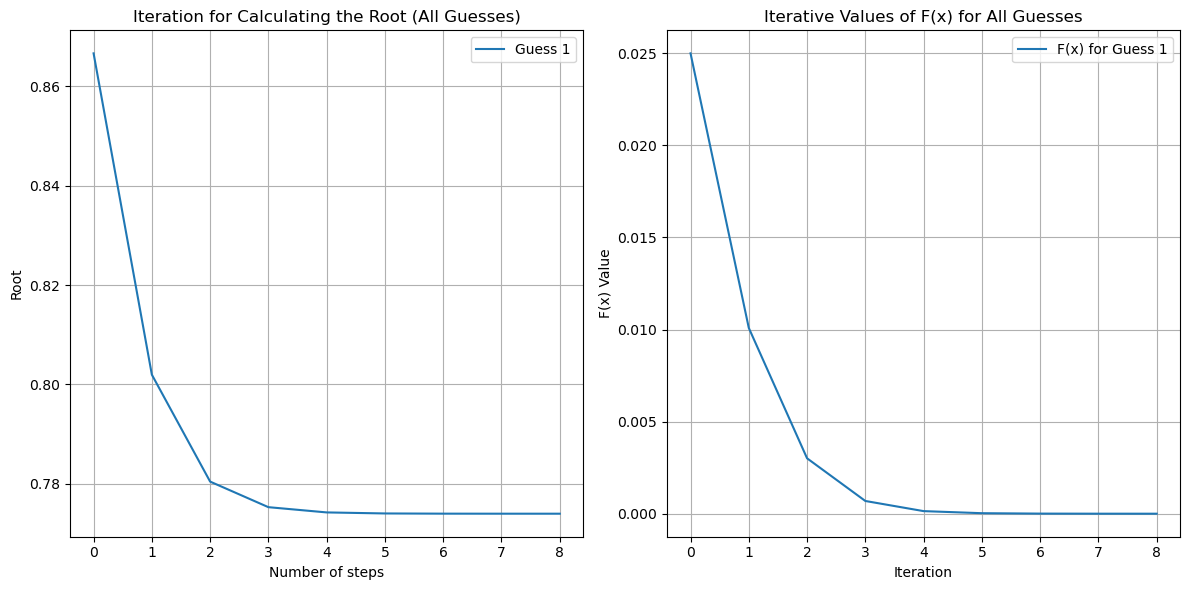

The distance from the fixed end at which the concentrated load is acting is found to be 0.7739266621727595 m.


In [20]:
'''
This code block calculates the distance from the fixed end of a cantilever beam where the concentrated load is acting for a given
set of parameters using Newton Solver.
'''
P = 3000000         # Load
L = 1               # Length of the beam
E = 200000000000    # Young's modulus
w = 0.1             # Width of the beam
h = 0.2             # Height of the beam
I = w*(h**3)/12     # Second moment of area
delta_A = 0.05      # Deflection at the point where load is acting
F = lambda x: np.array([P*(x**2)*(3*L - x)/(6*E*I) - delta_A])
J = lambda x: np.array([[P*(x**2)*(9*L - 4*x)/(6*E*I)]])
x0_list = np.array([L])
root = ns.run_newton_solver(F, J, x0_list, tol = 1e-6, max_iter= 100)
print("The distance from the fixed end at which the concentrated load is acting is found to be",root[0].item(),"m.")

## Example 5
### Fixed Points of a 2D system.
The theory is similar to that of Example 2. Let's take a 2D system:
$$\frac{\mathrm{d}x}{\mathrm{d}t} = x^2 + y^2 - 4$$
$$\frac{\mathrm{d}y}{\mathrm{d}t} = e^x + y - 1$$
Let's take multiple initial guesses to calculate the fixed points.

In [21]:
F = lambda x: np.array([(x[0])**2 + x[1]**2 - 4, np.exp(x[0]) + x[1] - 1])
J = lambda x: np.array([[2*x[0], 2*x[1]],[np.exp(x[0]), 1]])
x0_list = [[1.0, 1.0],[-1.0, 1.0],[1.0, -1.0],[-1.0,-1.0]]
roots = ns.run_newton_solver(F, J, x0_list, tol = 1e-6, max_iter= 100)
for i, root in enumerate(roots, 1):
    print(f"Fixed Point {i}: (x, y) = ({root[0]:.6f}, {root[1]:.6f})")

Fixed Point 1: (x, y) = (-1.816264, 0.837368)
Fixed Point 2: (x, y) = (1.004169, -1.729637)
